<a href="https://colab.research.google.com/github/dodozaki/deepleaning/blob/main/Metadata_visualisationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torchxrayvision

import pytest
import os
import pandas as pd
import numpy as np

import pytest
import torch
import torchvision
import torchxrayvision as xrv
from tqdm import tqdm
import sys

In [ ]:
path='/content/drive/MyDrive/metadata.csv'
metadata=pd.read_csv(path)
metadata.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
def test_dataloader_stats():
    # print stats
    for views in [["PA","AP"],["AP Supine"]]:
        print(xrv.datasets.COVID19_Dataset(views=views,
                                             imgpath="images",
                                             csvpath="metadata.csv"))
        
def test_dataloader():
    d_covid19 = xrv.datasets.COVID19_Dataset(views=["PA", "AP", "AP Supine"],
                                             imgpath="images",
                                             csvpath="metadata.csv")
    print(d_covid19)

    for i in tqdm(range(len(d_covid19))):
        # start from the most recent
        a = d_covid19[len(d_covid19)-i-1]

In [ ]:
def test_no_duplicate_images():
    filenames = metadata["filename"]
    assert len(set(filenames)) == len(filenames)

def test_no_unlinked_images():
    linked_images = metadata["filename"]
    all_images = os.listdir("images")
    #The only unlinked image should be the warning image
    assert set(all_images).difference(set(linked_images)) == set(['FAFA-A1BF-49A8-A1D3-66FAFA41B7345D.jpg'])

def test_no_pediatric():
    assert min(metadata["age"]) >= 18

In [ ]:
print(metadata.columns)

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')


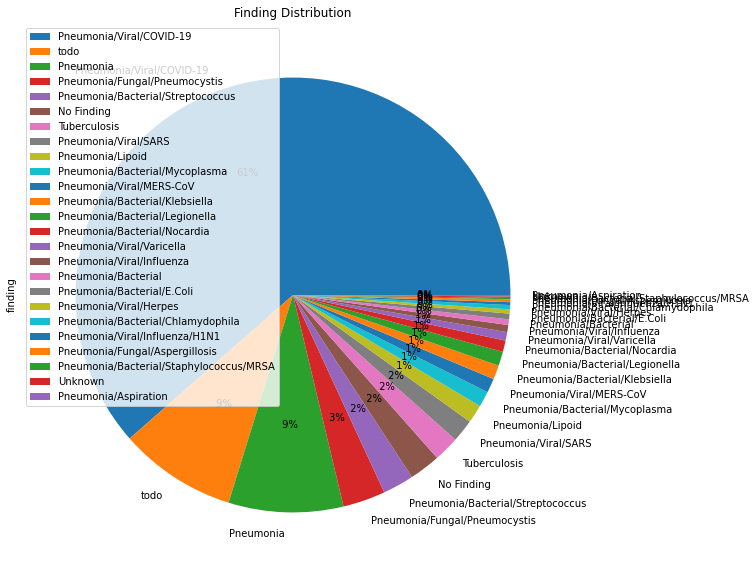

In [ ]:
# Finding distribution (nan if unknown)
ax = metadata['finding'].value_counts(dropna=False).plot.pie(y='Finding', legend = True, autopct='%2.0f%%', figsize = (10,10), title = 'Finding Distribution')

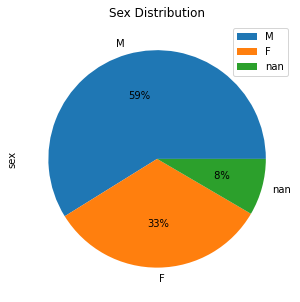

In [ ]:
# Sex distribution (nan if unknown)
ax = metadata['sex'].value_counts(dropna=False).plot.pie(y='sex', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Sex Distribution')

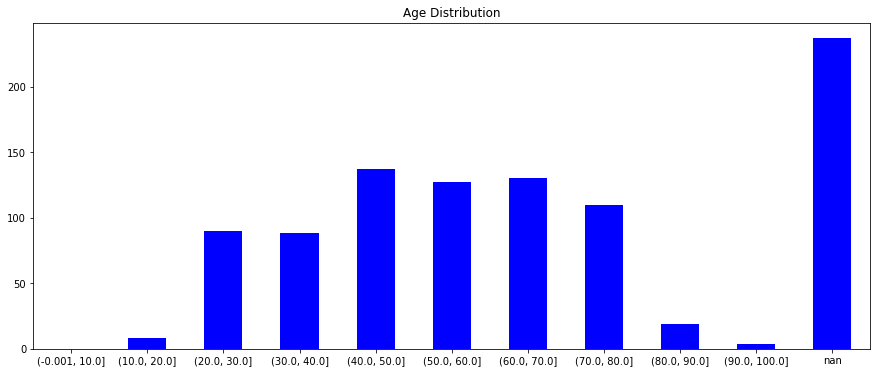

In [ ]:
import matplotlib.pyplot as plt
# Now age (nan in unknown)
out = pd.cut(metadata['age'], bins=np.arange(0,110,10).tolist(), include_lowest=True)
ax = out.value_counts(sort=False, dropna=False).plot.bar(rot=0, color="b", figsize=(15,6), title= "Age Distribution")
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

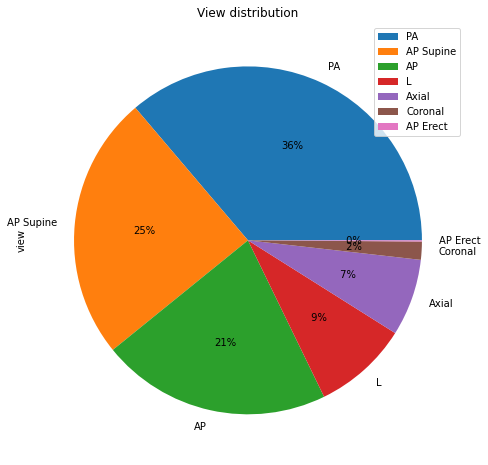

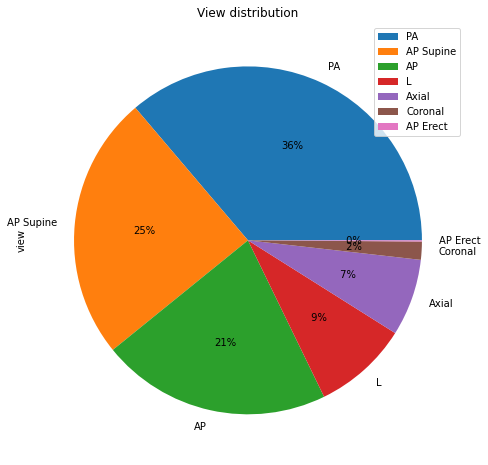

In [ ]:
# View
ax = metadata['view'].value_counts(dropna=False).plot.pie(y='view', legend = True, autopct='%2.0f%%', figsize = (8,8), title = 'View distribution')

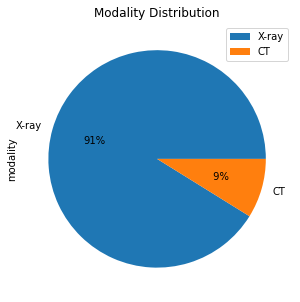

In [ ]:
# Modality
ax = metadata['modality'].value_counts(dropna=False).plot.pie(y='modality', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Modality Distribution')

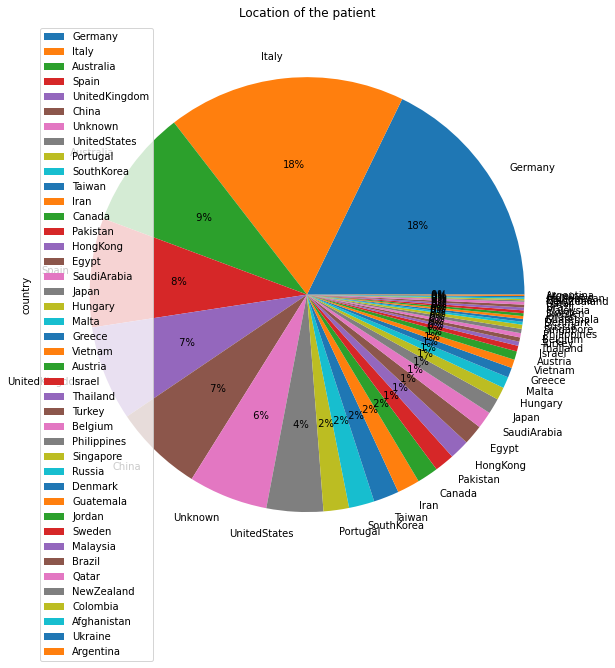

In [ ]:
# Location
metadata['country'] = metadata['location'].apply(lambda x: x.split(',')[-1].replace(" ","") if x is not np.nan else "Unknown")
ax = metadata['country'].value_counts(dropna=False).plot.pie(y='country', legend = True, autopct='%2.0f%%', figsize = (10,10), title = 'Location of the patient')